In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup for visualizations
sns.set(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv("PDS District Wise Monthly Wheat and Rice_Sample_Data.csv")

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Month (month)                                        500 non-null    object 
 1   State (state_name)                                   500 non-null    object 
 2   State Code (state_code)                              500 non-null    int64  
 3   District (district_name)                             500 non-null    object 
 4   District Code (district_code)                        500 non-null    int64  
 5   Total Rice Allocated (total_rice_allocated)          500 non-null    float64
 6   Total Wheat Allocated (total_wheat_allocated)        500 non-null    float64
 7   Total Rice Distributed (total_rice_distributed)      500 non-null    float64
 8   Total Wheat Distritibuted (total_wheat_distributed)  500 non-null    fl

,Month (month),State (state_name),State Code (state_code),District (district_name),District Code (district_code),Total Rice Allocated (total_rice_allocated),Total Wheat Allocated (total_wheat_allocated),Total Rice Distributed (total_rice_distributed),Total Wheat Distritibuted (total_wheat_distributed)
0,2020-12-01,Nagaland,13,Wokha,250,537.36,0.00,527.37,0.00
1,2019-12-01,Uttarakhand,5,Dehradun,49,6538.04,4007.17,3572.00,1831.22
2,2020-07-01,Odisha,21,Nuapada,368,3122.22,179.71,3096.75,177.28
3,2020-08-01,Telangana,36,Nagarkurnool,694,2610.94,0.00,2396.58,0.00
4,2020-01-01,Uttar Pradesh,9,Mainpuri,166,2566.83,3735.51,2430.78,3535.60


In [4]:
# Check for missing values
df.isnull().sum()

Month (month)                                          0
State (state_name)                                     0
State Code (state_code)                                0
District (district_name)                               0
District Code (district_code)                          0
Total Rice Allocated (total_rice_allocated)            0
Total Wheat Allocated (total_wheat_allocated)          0
Total Rice Distributed (total_rice_distributed)        0
Total Wheat Distritibuted (total_wheat_distributed)    0
dtype: int64

In [5]:
# Standardize column names
df.columns = [
    "month", "state", "state_code", "district", "district_code",
    "rice_allocated", "wheat_allocated", "rice_distributed", "wheat_distributed"
]

In [6]:
# Convert 'month' to datetime format
df["month"] = pd.to_datetime(df["month"], format="%Y-%m-%d")

In [7]:
# Avoid division by zero using np.where
df["rice_efficiency"] = np.where(df["rice_allocated"] > 0,
                                 df["rice_distributed"] / df["rice_allocated"], 0)

df["wheat_efficiency"] = np.where(df["wheat_allocated"] > 0,
                                  df["wheat_distributed"] / df["wheat_allocated"], 0)

In [8]:
# Check descriptive statistics
df.describe()

,month,state_code,district_code,rice_allocated,wheat_allocated,rice_distributed,wheat_distributed,rice_efficiency,wheat_efficiency
count,500,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2019-07-14 08:00:57.599999744,18.716000,363.922000,4021.82116,3331.833100,3276.582920,2348.740600,0.804816,0.602625
min,2017-08-01 00:00:00,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-08-01 00:00:00,9.000000,199.250000,1007.50750,0.000000,793.887500,0.000000,0.752635,0.000000
50%,2019-07-01 00:00:00,20.500000,370.000000,2785.54500,1344.375000,2365.770000,910.535000,0.929911,0.859052
75%,2020-05-08 18:00:00,24.250000,521.250000,5439.58750,4344.272500,4698.620000,3657.310000,0.983491,0.959105
max,2021-11-01 00:00:00,36.000000,723.000000,43221.43000,66225.130000,23004.580000,18864.800000,8.964878,4.600000
std,NaN,9.823459,201.244644,4531.76887,5721.292039,3373.371144,3263.282777,0.515176,0.489325


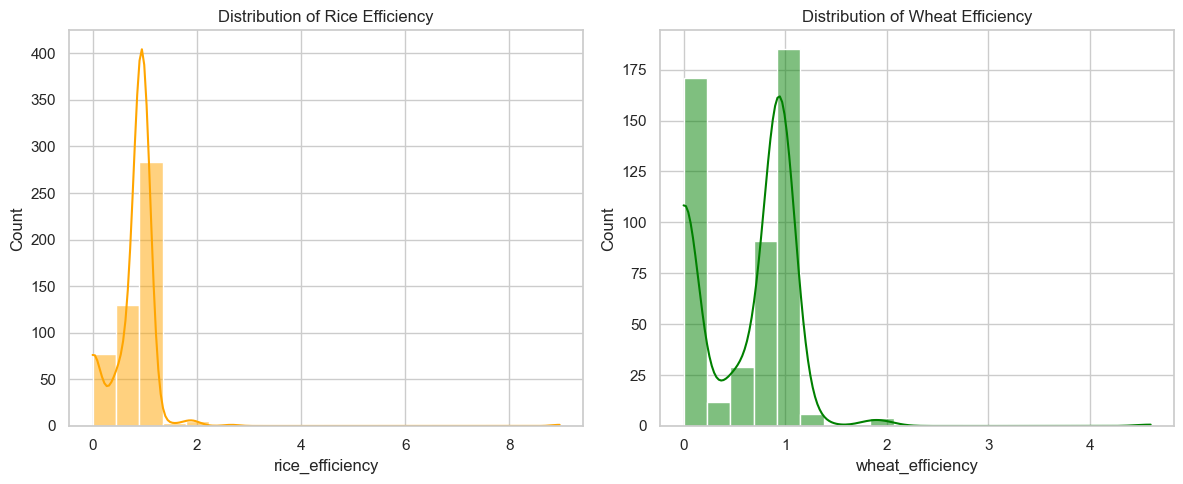

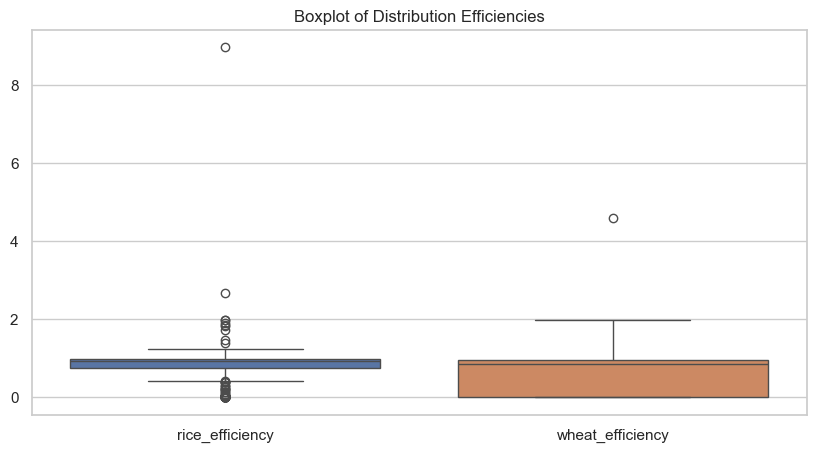

In [9]:
# Plot efficiency histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["rice_efficiency"], bins=20, kde=True, color="orange")
plt.title("Distribution of Rice Efficiency")

plt.subplot(1, 2, 2)
sns.histplot(df["wheat_efficiency"], bins=20, kde=True, color="green")
plt.title("Distribution of Wheat Efficiency")

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["rice_efficiency", "wheat_efficiency"]])
plt.title("Boxplot of Distribution Efficiencies")
plt.show()

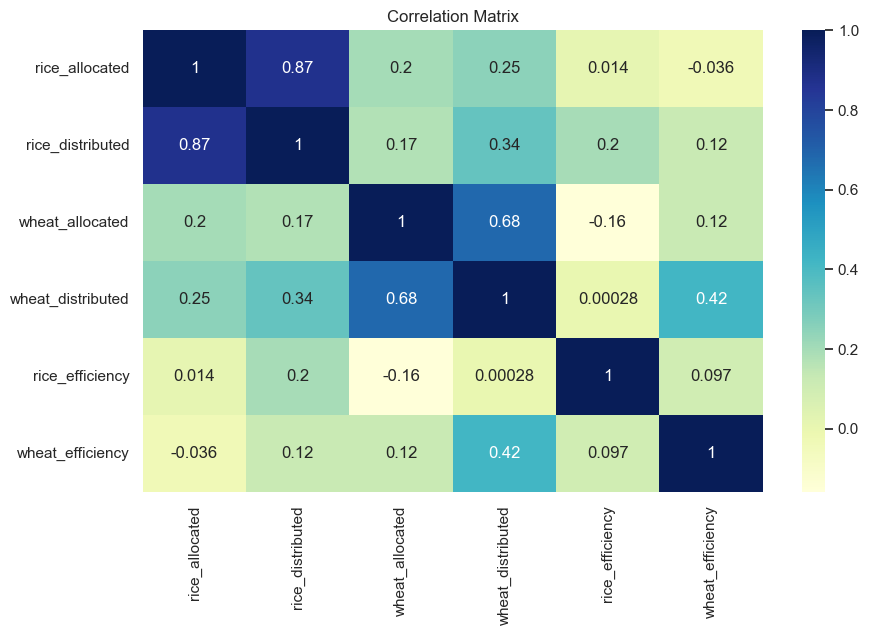

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[["rice_allocated", "rice_distributed", "wheat_allocated", "wheat_distributed",
           "rice_efficiency", "wheat_efficiency"]].corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


In [11]:
# View top and bottom districts by rice efficiency
top_rice = df.sort_values("rice_efficiency", ascending=False).head(10)
bottom_rice = df.sort_values("rice_efficiency").head(10)

# View top and bottom districts by wheat efficiency
top_wheat = df.sort_values("wheat_efficiency", ascending=False).head(10)
bottom_wheat = df.sort_values("wheat_efficiency").head(10)

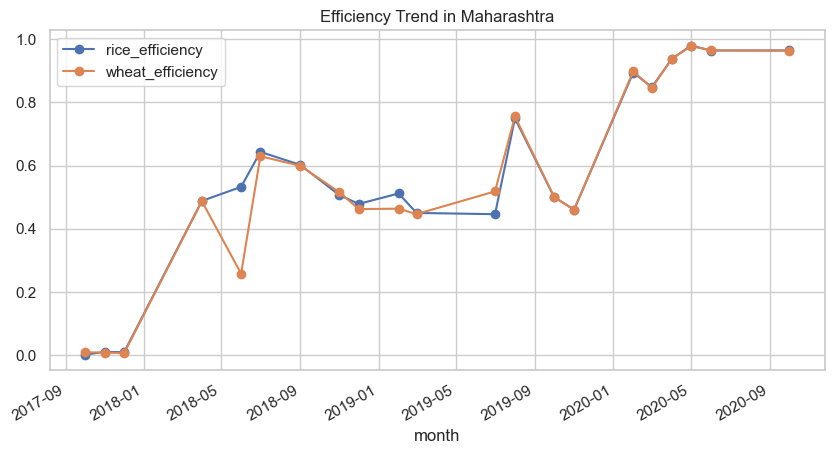

In [12]:
# Average efficiency by state
state_eff = df.groupby("state")[["rice_efficiency", "wheat_efficiency"]].mean().sort_values("rice_efficiency", ascending=False)
state_eff.head(10)  # Top performing states by rice efficiency

# Efficiency over time by a single state (example: Maharashtra)
up_df = df[df["state"] == "Maharashtra"]
up_trend = up_df.groupby("month")[["rice_efficiency", "wheat_efficiency"]].mean()

up_trend.plot(marker='o', figsize=(10, 5), title="Efficiency Trend in Maharashtra")
plt.grid(True)
plt.show()


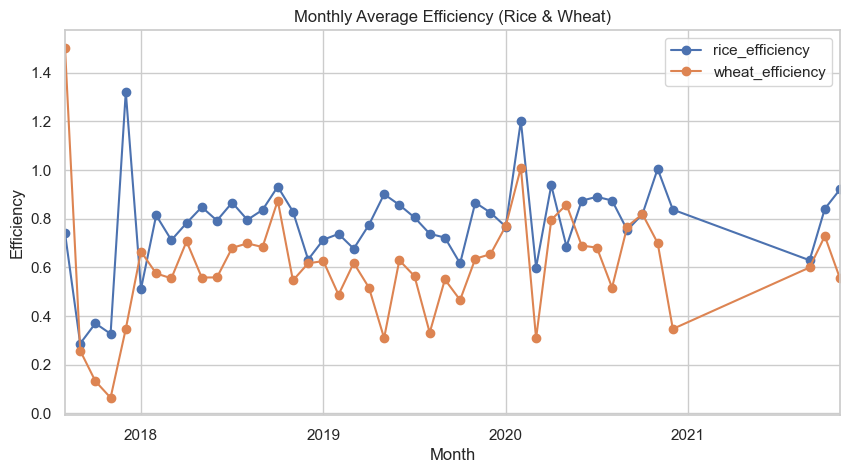

In [13]:
# Group by month and compute average efficiencies
monthly_avg = df.groupby(df["month"].dt.to_period("M"))[["rice_efficiency", "wheat_efficiency"]].mean()

# Plot trend
monthly_avg.plot(marker='o', figsize=(10, 5), title="Monthly Average Efficiency (Rice & Wheat)")
plt.ylabel("Efficiency")
plt.xlabel("Month")
plt.grid(True)
plt.show()

In [14]:
df[["rice_efficiency", "wheat_efficiency"]].describe()

,rice_efficiency,wheat_efficiency
count,500.000000,500.000000
mean,0.804816,0.602625
std,0.515176,0.489325
min,0.000000,0.000000
25%,0.752635,0.000000
50%,0.929911,0.859052
75%,0.983491,0.959105
max,8.964878,4.600000


In [15]:
df[["rice_allocated", "rice_distributed", "wheat_allocated", "wheat_distributed"]].corr()

,rice_allocated,rice_distributed,wheat_allocated,wheat_distributed
rice_allocated,1.000000,0.872526,0.199148,0.251217
rice_distributed,0.872526,1.000000,0.172105,0.336822
wheat_allocated,0.199148,0.172105,1.000000,0.681554
wheat_distributed,0.251217,0.336822,0.681554,1.000000


In [16]:
df[df["rice_efficiency"] < 0.5][["state", "district", "rice_efficiency"]].head()
df[df["wheat_efficiency"] < 0.5][["state", "district", "wheat_efficiency"]].head()

,state,district,wheat_efficiency
0,Nagaland,Wokha,0.000000
1,Uttarakhand,Dehradun,0.456986
3,Telangana,Nagarkurnool,0.000000
5,Telangana,Warangal_Urban,0.000000
7,Maharashtra,Jalgaon,0.455700


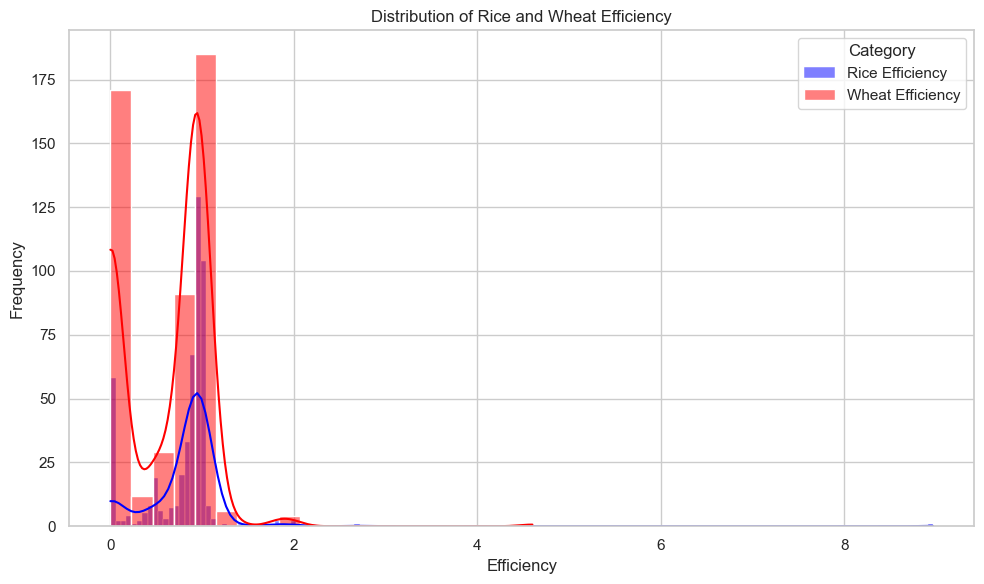

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot rice efficiency in blue
sns.histplot(df["rice_efficiency"], kde=True, color='blue', label='Rice Efficiency')

# Plot wheat efficiency in red
sns.histplot(df["wheat_efficiency"], kde=True, color='red', label='Wheat Efficiency')

# Add plot labels and legend
plt.title("Distribution of Rice and Wheat Efficiency")
plt.xlabel("Efficiency")
plt.ylabel("Frequency")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import skew, kurtosis

rice_skew = skew(df["rice_efficiency"])
wheat_skew = skew(df["wheat_efficiency"])
rice_kurt = kurtosis(df["rice_efficiency"])
wheat_kurt = kurtosis(df["wheat_efficiency"])

print(f"Rice: Skew={rice_skew:.2f}, Kurtosis={rice_kurt:.2f}")
print(f"Wheat: Skew={wheat_skew:.2f}, Kurtosis={wheat_kurt:.2f}")


Rice: Skew=7.71, Kurtosis=124.73
Wheat: Skew=0.89, Kurtosis=7.38


In [19]:
df[df["wheat_allocated"] == 0].shape[0]

141

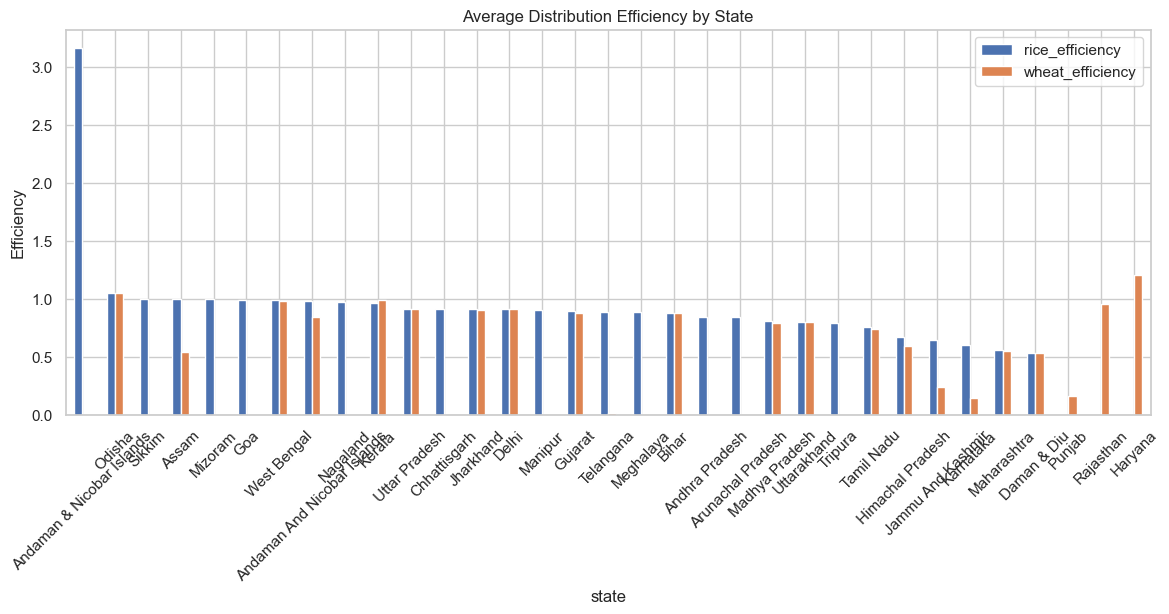

In [20]:
statewise_eff = df.groupby("state")[["rice_efficiency", "wheat_efficiency"]].mean().sort_values("rice_efficiency", ascending=False)
statewise_eff.plot(kind="bar", figsize=(14, 5))
plt.title("Average Distribution Efficiency by State")
plt.ylabel("Efficiency")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

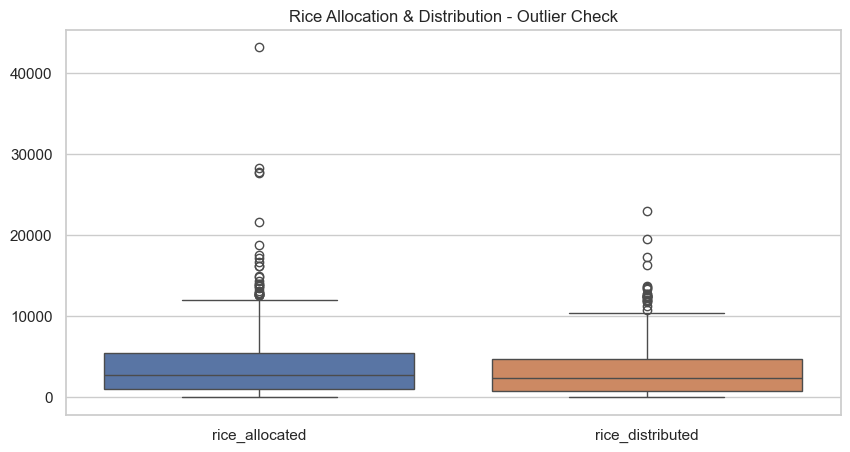

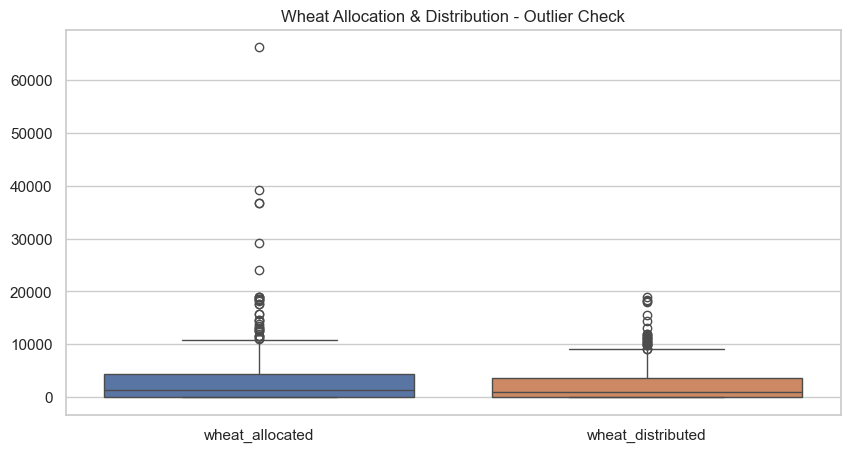

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Rice Allocated
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["rice_allocated", "rice_distributed"]])
plt.title("Rice Allocation & Distribution - Outlier Check")
plt.show()

# Boxplot for Wheat Allocated
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["wheat_allocated", "wheat_distributed"]])
plt.title("Wheat Allocation & Distribution - Outlier Check")
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler

# Normalize numerical variables (optional)
scaler = StandardScaler()
scaled_columns = ["rice_allocated", "wheat_allocated", "rice_distributed", "wheat_distributed"]

df_scaled = df.copy()
df_scaled[scaled_columns] = scaler.fit_transform(df_scaled[scaled_columns])
df_scaled.head()


,month,state,state_code,district,district_code,rice_allocated,wheat_allocated,rice_distributed,wheat_distributed,rice_efficiency,wheat_efficiency
0,2020-12-01,Nagaland,13,Wokha,250,-0.769667,-0.582940,-0.815791,-0.720469,0.981409,0.000000
1,2019-12-01,Uttarakhand,5,Dehradun,49,0.555796,0.118157,0.087661,-0.158748,0.546341,0.456986
2,2020-07-01,Odisha,21,Nuapada,368,-0.198709,-0.551498,-0.053363,-0.666089,0.991842,0.986478
3,2020-08-01,Telangana,36,Nagarkurnool,694,-0.311643,-0.582940,-0.261129,-0.720469,0.917899,0.000000
4,2020-01-01,Uttar Pradesh,9,Mainpuri,166,-0.321386,0.070628,-0.250980,0.364065,0.946997,0.946484


In [23]:
# Example: Label Encoding for 'state' and 'district'
from sklearn.preprocessing import LabelEncoder

le_state = LabelEncoder()
df["state_encoded"] = le_state.fit_transform(df["state"])

le_district = LabelEncoder()
df["district_encoded"] = le_district.fit_transform(df["district"])


In [24]:
#Hypothesis testing
from scipy.stats import ttest_ind

# Hypothesis:
# H0: Mean rice_efficiency == Mean wheat_efficiency
# H1: Mean rice_efficiency != Mean wheat_efficiency

t_stat, p_val = ttest_ind(df["rice_efficiency"], df["wheat_efficiency"], equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


T-statistic: 6.3631, P-value: 0.0000


In [25]:
#Regression Analysis
#Rice
import statsmodels.api as sm

X_rice = sm.add_constant(df["rice_allocated"])
y_rice = df["rice_distributed"]
model_rice = sm.OLS(y_rice, X_rice).fit()
print(model_rice.summary())


                            OLS Regression Results                            
Dep. Variable:       rice_distributed   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1588.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          4.97e-157
Time:                        14:24:35   Log-Likelihood:                -4412.7
No. Observations:                 500   AIC:                             8829.
Df Residuals:                     498   BIC:                             8838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            664.4364     98.689      6.

In [26]:
#Regression Analysis
#Wheat
X_wheat = sm.add_constant(df["wheat_allocated"])
y_wheat = df["wheat_distributed"]
model_wheat = sm.OLS(y_wheat, X_wheat).fit()
print(model_wheat.summary())

                            OLS Regression Results                            
Dep. Variable:      wheat_distributed   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     432.0
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.50e-69
Time:                        14:24:35   Log-Likelihood:                -4598.1
No. Observations:                 500   AIC:                             9200.
Df Residuals:                     498   BIC:                             9209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1053.5189    123.738     

In [27]:
#ANOVA – Difference in rice efficiency across top states
import scipy.stats as stats

top_states = df["state"].value_counts().head(3).index.tolist()
subset = df[df["state"].isin(top_states)]
anova_result = stats.f_oneway(*[group["rice_efficiency"] for name, group in subset.groupby("state")])
print(f"F-statistic: {anova_result.statistic:.4f}, P-value: {anova_result.pvalue:.4f}")


F-statistic: 6.5804, P-value: 0.0019


In [28]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Feature and target
X = df[["rice_allocated"]]
y = df["rice_distributed"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
 
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 1809426.98
R² Score: 0.85
Mean Absolute Error: 963.44


C:\Users\SUJAL JUNGHARE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SUJAL JUNGHARE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SUJAL JUNGHARE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SUJAL JUNGHARE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

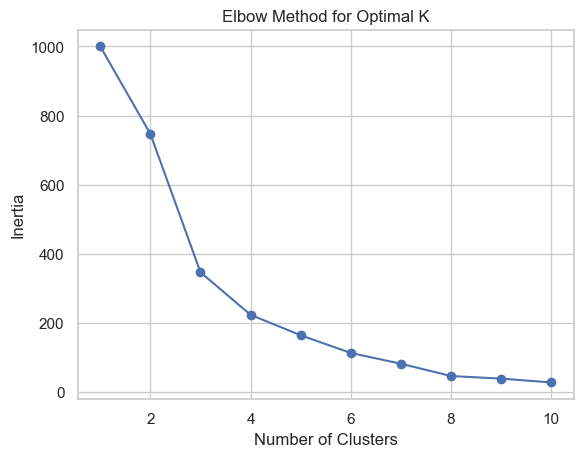

C:\Users\SUJAL JUNGHARE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


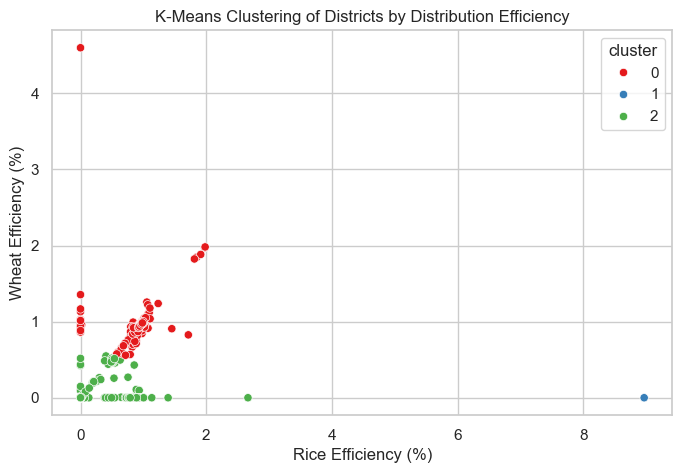

Cluster Centers (original scale):
[[0.85806014 0.95588575]
 [8.96487805 0.        ]
 [0.68441646 0.0775126 ]]


In [29]:
#Clustering using KMeans
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
X = df[['rice_efficiency', 'wheat_efficiency']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with chosen K (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='rice_efficiency', y='wheat_efficiency', hue='cluster', palette='Set1')
plt.title('K-Means Clustering of Districts by Distribution Efficiency')
plt.xlabel('Rice Efficiency (%)')
plt.ylabel('Wheat Efficiency (%)')
plt.show()

# Optional: Check cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):")
print(cluster_centers)


In [60]:
# Round efficiency columns to 2 decimal places for readability
df['rice_efficiency'] = df['rice_efficiency'].round(2)
df['wheat_efficiency'] = df['wheat_efficiency'].round(2)

# Display the first few rows to verify the new columns
print("Updated Dataset with Efficiency Columns:")
display(df.head())

# Save the updated dataset to a CSV file
output_file = 'PDS_MINI_with_efficiency.csv'
df.to_csv(output_file, index=False)
print(f"Updated dataset saved as '{output_file}' in CSV format")

# Provide a download link for the CSV file in Jupyter Notebook
from IPython.display import FileLink
display(FileLink(output_file))

Updated Dataset with Efficiency Columns:


,month,state,state_code,district,district_code,rice_allocated,wheat_allocated,rice_distributed,wheat_distributed,rice_efficiency,wheat_efficiency,state_encoded,district_encoded,cluster
0,2020-12-01,Nagaland,13,Wokha,250,537.36,0.00,527.37,0.00,0.98,0.00,22,360,2
1,2019-12-01,Uttarakhand,5,Dehradun,49,6538.04,4007.17,3572.00,1831.22,0.55,0.46,31,68,2
2,2020-07-01,Odisha,21,Nuapada,368,3122.22,179.71,3096.75,177.28,0.99,0.99,23,242,0
3,2020-08-01,Telangana,36,Nagarkurnool,694,2610.94,0.00,2396.58,0.00,0.92,0.00,28,221,2
4,2020-01-01,Uttar Pradesh,9,Mainpuri,166,2566.83,3735.51,2430.78,3535.60,0.95,0.95,30,195,0


Updated dataset saved as 'PDS_MINI_with_efficiency.csv' in CSV format


C:\Users\SUJAL JUNGHARE\Downloads\PDS_MINI_with_efficiency.csv